# An example

Import the necessary libraries

In [1]:
import json
import csv
import time
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import mplfinance as mpf


Get data

In [2]:
with open(f'./sample-data/EUR_USD.json', 'r', encoding='UTF8', newline='') as in_file:
    json_data = json.load(in_file)

instrument = json_data['instrument']
data_granularity = json_data['granularity']
candles = json_data['candles']
print(f"Data is for {instrument}; {len(candles)} candles of {data_granularity} ")


Data is for EUR_USD; 500 candles of D 


Start doing the analysis here

In [3]:
flatten_data = [
    [ 
        datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
        bool(x['complete']), 
        int(x['volume']), 
        float(x['mid']['o']), 
        float(x['mid']['h']), 
        float(x['mid']['l']), 
        float(x['mid']['c'])
    ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time','complete', 'Volume', 'Open', 'High', 'Low', 'Close'])

print(f"df shape: {df.shape}")


df shape: (500, 7)


In [4]:
df['ma'] = df['Close'].rolling(20).mean()
df['ewm'] = df['Close'].ewm(span=20, adjust=False).mean()

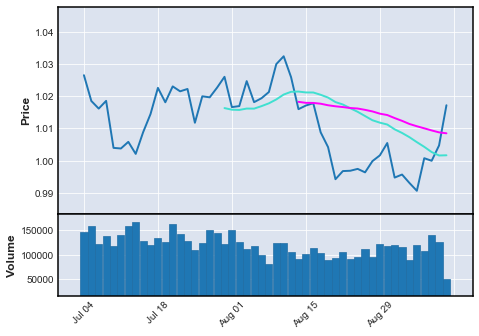

,complete,Volume,Open,High,Low,Close,ma,ewm
time,,,,,,,,
2022-07-04 21:00:00,True,146797,1.04234,1.04489,1.02351,1.02652,1.050052,1.049864
2022-07-05 21:00:00,True,158288,1.02676,1.02768,1.01614,1.01851,1.047395,1.046878
2022-07-06 21:00:00,True,122991,1.01824,1.02212,1.01442,1.01614,1.045108,1.043950
2022-07-07 21:00:00,True,138828,1.01639,1.01914,1.00716,1.01854,1.043433,1.041530
2022-07-10 21:00:00,True,119074,1.01783,1.01851,1.00337,1.00393,1.041587,1.037949
2022-07-11 21:00:00,True,140546,1.00400,1.00740,1.00000,1.00374,1.039689,1.034691
2022-07-12 21:00:00,True,158173,1.00363,1.01224,0.99980,1.00580,1.037746,1.031940
2022-07-13 21:00:00,True,167428,1.00595,1.00614,0.99522,1.00206,1.035087,1.029094
2022-07-14 21:00:00,True,127690,1.00180,1.00980,1.00069,1.00878,1.033057,1.027159


In [5]:
dfx = df.tail(150).set_index('time')

mpf.plot(dfx, type='line', 
    mav=(20, 30),
    # hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    volume=True)

dfx

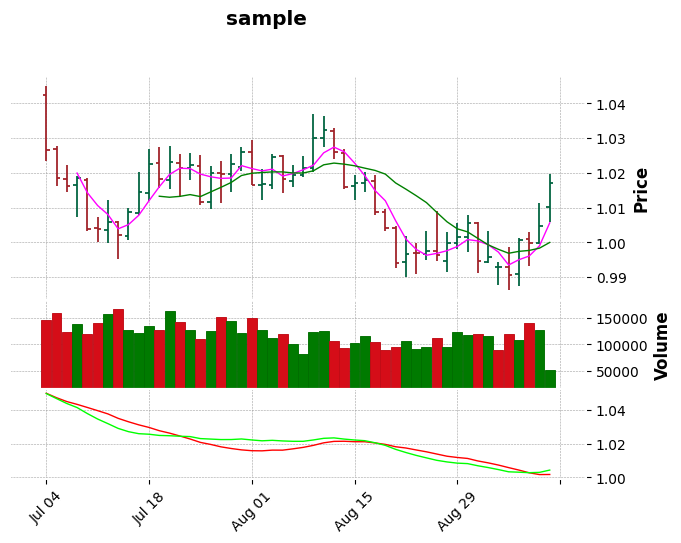

In [6]:
ap0 = [ 
    mpf.make_addplot(dfx['ma'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

#  mpf.available_styles()


mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(
    base_mpf_style='charles',
    mavcolors=['fuchsia','g','r'],
    #mavcolors=['#1f77b4','#ff7f0e','#2ca02c'],
    #marketcolors=mc
    )

mpf.plot(dfx, type='ohlc',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

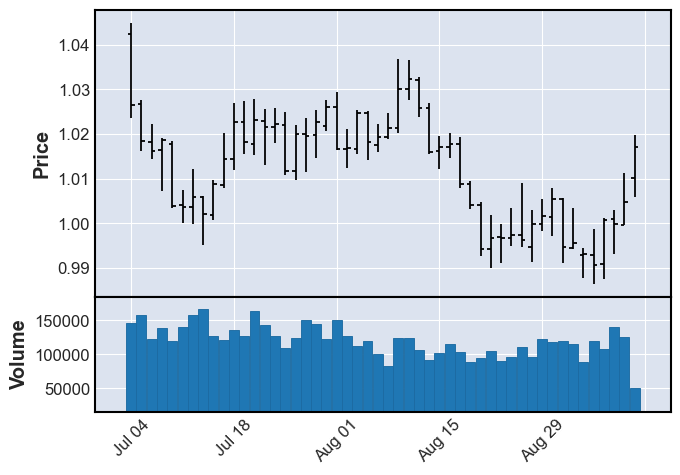

In [7]:
mpf.plot(dfx,volume=True)
